In [1]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ensayo3_excel = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery\MI_coordinates.csv"


ensayo3_dict = pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict = pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

In [3]:
ensayos_dfs = []
for sujeto in ensayo3_dict.keys():
    ensayos_dfs.append(ensayo3_dict[sujeto])


In [15]:
# Filtrado de matrices
def capsula(lista_dfs, th, porcentaje_):
    # Conjuntamos las matrices
    stack = np.stack([df.values for df in lista_dfs])
    # Aplicamos filtro a cada matriz
    above = stack > th
    
    N = len(lista_dfs) # = 109
    count_above = above.sum(axis=0) # Contando cuantos valores superan el umbral en celda
    
    min_requerido = int(np.ceil(porcentaje_*N)) # 0.6*109 = 65.4
    # con esto bastara con quedarnos con las celdas de 'above' que cumplan con min_requerido
    # para así tener el número de sujetos que superan el umbral
    result_bool = count_above >= min_requerido
    
    result_df = pd.DataFrame(result_bool, 
                             index=lista_dfs[0].index, 
                             columns=lista_dfs[0].columns).astype(int)
    return result_df

In [16]:
resultado_df = capsula(ensayos_dfs, 0.5, 0.6)

<Axes: >

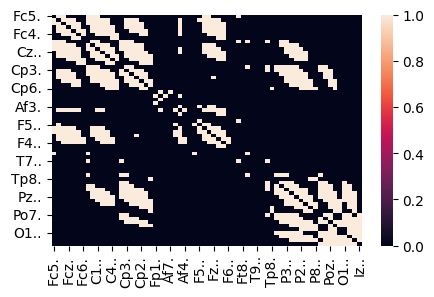

In [17]:
plt.figure(figsize=(5, 3))

sns.heatmap(resultado_df)

# Generar estadísticos para decidir umbrales 

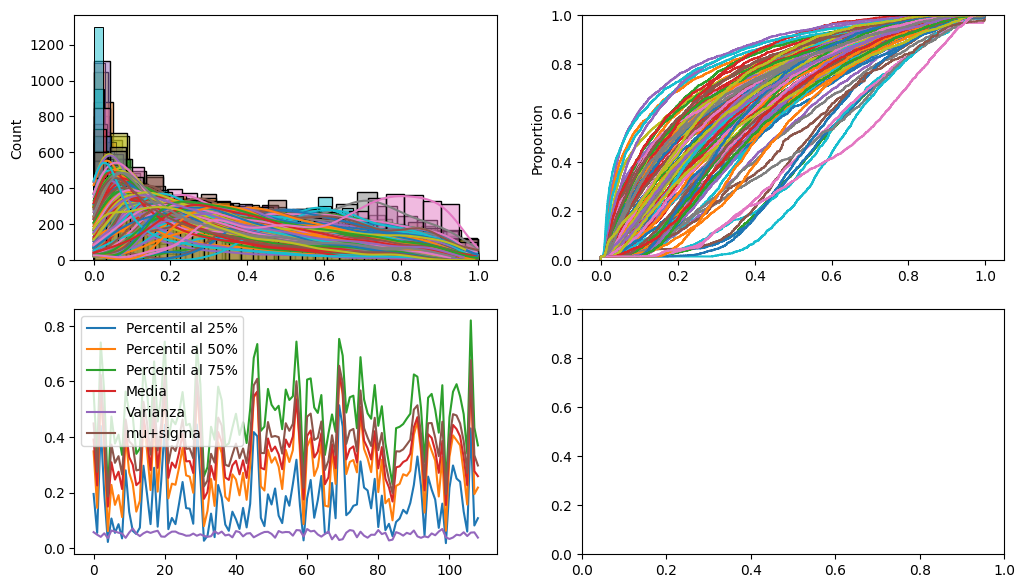

In [6]:
ensayos_dfs

th25, th50, th75, promedio, varianza = [], [], [], [], []
mu_sigma = []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    # Calculo de estadísticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.var(data))
    mu_sigma.append(np.mean(data) + np.var(data))
    # Plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label='Percentil al 25%')
axes[1][0].plot(th50, label='Percentil al 50%')
axes[1][0].plot(th75, label='Percentil al 75%')
axes[1][0].plot(promedio, label='Media')
axes[1][0].plot(varianza, label='Varianza')
axes[1][0].plot(mu_sigma, label='mu+sigma')
axes[1][0].legend()


In [7]:
from scipy import stats
stats.median_abs_deviation(th25)

np.float64(0.06955915283857339)

In [8]:
estadisticos_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])

columnas = [th25, th50, th75, promedio, mu_sigma]

min_, max_, mediana_, cosa_ = [], [], [], []
for columna in columnas:
    d1, d2, d3, d4 = np.min(columna), np.max(columna), np.median(columna), stats.median_abs_deviation(columna)
    min_.append(d1)
    max_.append(d2)
    mediana_.append(d3)
    cosa_.append(d4)
estadisticos_df.loc['min'] = min_
estadisticos_df.loc['max'] = max_
estadisticos_df.loc['mediana'] = mediana_
estadisticos_df.loc['cosa_rara'] = cosa_

In [14]:
test_df = pd.DataFrame(columns=['th25', 'th50', 'th75', 'promedio', 'mu_sigma'], 
                               index=['min', 'max', 'mediana', 'cosa_rara'])
estadisticos_ = [th25, th50, th75, promedio, mu_sigma]

for idx, columna in enumerate(test_df.columns):
    test_df[columna] = [np.min(estadisticos_[idx]), np.min(estadisticos_[idx]), 
                        np.median(min(estadisticos_[idx])), stats.median_abs_deviation(estadisticos_[idx])]
test_df

,th25,th50,th75,promedio,mu_sigma
min,0.018413,0.061750,0.196867,0.149821,0.186222
max,0.018413,0.061750,0.196867,0.149821,0.186222
mediana,0.018413,0.061750,0.196867,0.149821,0.186222
cosa_rara,0.069559,0.080172,0.074567,0.063494,0.060276


Text(0.5, 1.0, 'umbral=0.2, poblacion>60%')

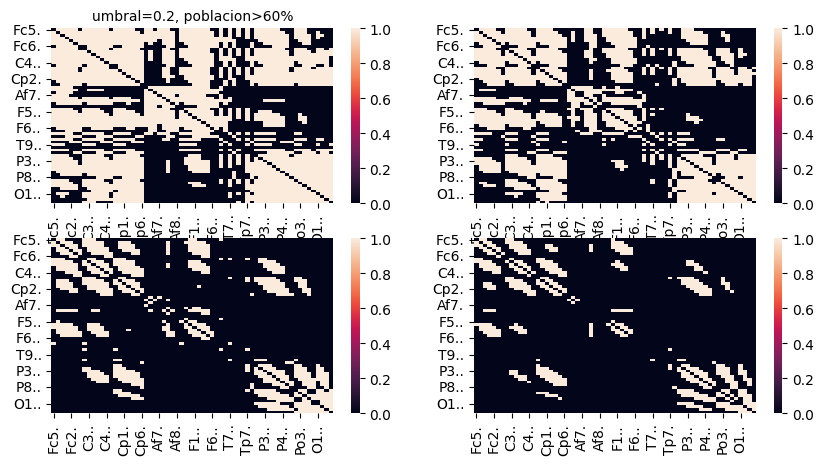

In [34]:
resultado_df1 = capsula(ensayos_dfs, 0.2, 0.6)
resultado_df2 = capsula(ensayos_dfs, 0.3, 0.6)
resultado_df3 = capsula(ensayos_dfs, 0.5, 0.6)
resultado_df4 = capsula(ensayos_dfs, 0.6, 0.6)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado_df1, ax=axes[0, 0])
sns.heatmap(resultado_df2, ax=axes[0, 1])
sns.heatmap(resultado_df3, ax=axes[1, 0])
sns.heatmap(resultado_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.2, poblacion>60%', fontsize=10)

Text(0.5, 1.0, 'umbral=0.3, poblacion>50%')

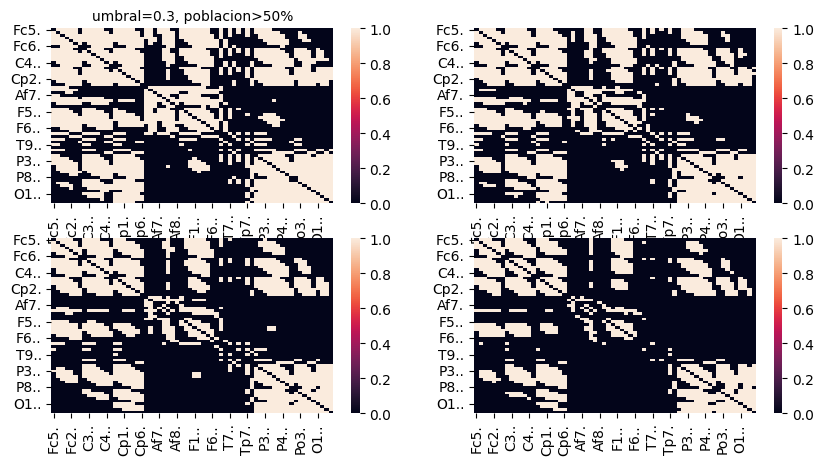

In [36]:
resultado_df1 = capsula(ensayos_dfs, 0.3, 0.5)
resultado_df2 = capsula(ensayos_dfs, 0.3, 0.6)
resultado_df3 = capsula(ensayos_dfs, 0.3, 0.7)
resultado_df4 = capsula(ensayos_dfs, 0.3, 0.8)

fig, axes = plt.subplots(2, 2, figsize=(10, 5))

sns.heatmap(resultado_df1, ax=axes[0, 0])
sns.heatmap(resultado_df2, ax=axes[0, 1])
sns.heatmap(resultado_df3, ax=axes[1, 0])
sns.heatmap(resultado_df4, ax=axes[1, 1])
# plt.title('Mapas de calor para comparativa de umbrales')
axes[0, 0].set_title('umbral=0.3, poblacion>50%', fontsize=10)

# Generación de resultados

Después del análisis realizado, utilizando los mapas de calor, para poder escoger un threshold adecuado y un porcentaje de la población que cumpla dicho umbral; se procederá a generar los resultados.

Resultados a generar:
- Grafo2D
- Grafo3D
- Métricas de grafo
- Gráfico de comunidades con Hub

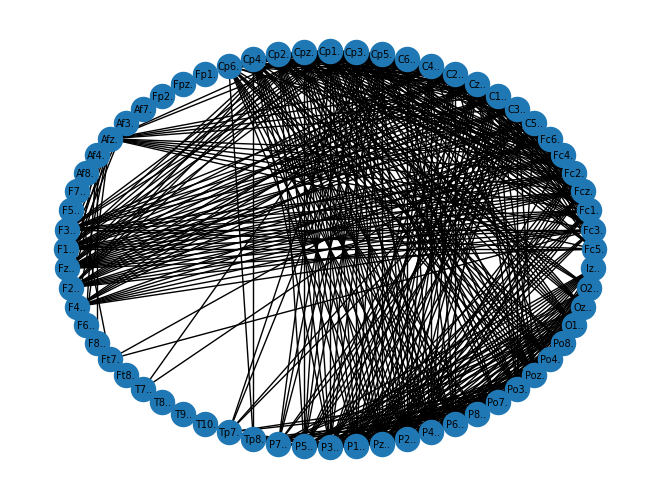

In [42]:
# Grafo 2D
ensayo_grafo = nx.from_pandas_adjacency(resultado_df4)
nx.draw_circular(ensayo_grafo, with_labels=True, font_size=7)

In [50]:
def metricas_grafo(G):
    # Métricas:
    #Clusterin promedio
    clust_coeff = nx.average_clustering(G)
    # Longitud de camino promedio (camino más corto)
    try:
        path_length = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        path_length = np.nan # red no conexa
    # Coeficiente de mundo pequeño
    # Comparar con grafo aleatorio de igual N, K
    G_rand = nx.gnm_random_graph(n=G.number_of_nodes(), m=G.number_of_edges())
    clust_rand = nx.average_clustering(G_rand)
    path_rand = nx.average_shortest_path_length(G_rand)
    small_world_sigma = (clust_coeff / clust_rand) / (path_length / path_rand)
    # Modularidad
    from networkx.algorithms import community
    communities = community.greedy_modularity_communities(G)
    modularity = community.modularity(G, communities)
    # Hubs
    degree_dict = dict(G.degree())
    betwenness = nx.betweenness_centrality(G)
    betwenness = sorted(betwenness.items(), key=lambda x: x[1], reverse=True)
    # Eficiencia global y local
    global_eff = nx.global_efficiency(G)
    local_eff = nx.local_efficiency(G)

    return (clust_coeff, path_length, small_world_sigma, communities, 
            modularity, betwenness, global_eff, local_eff, degree_dict)

In [51]:
(clust_coeff_, path_length_, small_world_sigma_, communities_, 
 modularity_, betwenness_, global_eff_, local_eff_, degree_dict_) = metricas_grafo(ensayo_grafo)

In [58]:
# construcción de dataframe de coordenadas
eeg_coords = pd.read_csv(coordenadas_csv)
eeg_coords.set_index("canal", drop=True, inplace=True)

In [75]:
%matplotlib widget

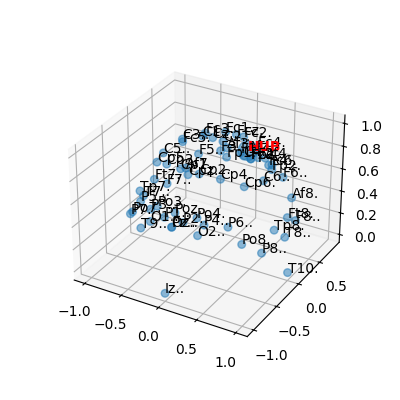

In [80]:
x, y, z = eeg_coords['x'].values, eeg_coords['y'].values, eeg_coords['z'].values
hub = betwenness_[0]

fig = plt.figure(figsize=(4, 4))
axes = [fig.add_subplot(1, 1, 1, projection='3d')]

nodes_size = [30 if idx != hub[0] else 200 for idx in eeg_coords.index]
axes[0].scatter(x, y, z, alpha=0.5, s=nodes_size)
for idx, (x_, y_, z_) in enumerate(zip(x, y, z)):
    axes[0].text(x_, y_, z_, eeg_coords.index[idx], fontsize=10)
    if eeg_coords.index[idx] == hub[0]:
        axes[0].text(x_, y_, z_, 'HUB', color='red', fontweight='bold', fontsize=10)